# Part 1: Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/judy/Desktop/cu/anomaly detection/health_data_clustering.csv")

In [3]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,avg covered charges/Average_Covered_Charges_by_Hospital,Minimum_Medicare_Payment_by_Hospital,Median_Medicare_Payment_by_Hospital,Average_Medicare_Payment_by_Hospital,Maximum_Medicare_Payment_by_Hospital,STD_Medicare_Payment_by_Hospital,SUM_of_Medicare_Payment_by_Hospital,avg medicare payment/Average_Medicare_Payment_by_Hospital,charge/medicare ratio,percentage of medciare payment to total payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,0.935201,2093.38,5683.385,7678.214348,32095.75,5990.735366,706395.72,0.620422,1.212756,0.824568
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,0.919808,2467.15,4976.710,5793.631429,13342.72,2784.451480,283887.94,0.858997,1.162931,0.859896
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,1.016729,1704.53,5228.300,7145.959535,32248.64,5636.247698,614552.52,0.623260,1.220298,0.819472
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,0.504304,2076.82,4842.360,6810.429310,29393.46,5032.249163,592507.35,0.606300,1.312025,0.762181
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,0.796244,2116.02,5183.575,6563.419000,29031.62,4435.211822,525073.52,0.739164,1.166320,0.857398


In [4]:
features = [' Total Discharges ', ' Average Total Payments ', 'Average Medicare Payments','total discharge/Average_Total_Discharge_by_DRG_definition ratio',
       'avg total payments/Average_Total_Payment_by_DRG_definition',
       'avg total payments/Average_Total_Payment_by_DRG_definition_by_State',
       'avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State',
       'avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State',
       'total_discharges/Average_Total_Discharge_by_Hospital',
       'avg total payment/Average_Total_Payment_by_Hospital',
       'avg covered charges/Average_Covered_Charges_by_Hospital',
       'avg medicare payment/Average_Medicare_Payment_by_Hospital',
       'charge/medicare ratio',
       'percentage of medciare payment to total payment']

In [5]:
df_clustering = df[features]

In [6]:
df_clustering.columns

Index([' Total Discharges ', ' Average Total Payments ',
       'Average Medicare Payments',
       'total discharge/Average_Total_Discharge_by_DRG_definition ratio',
       'avg total payments/Average_Total_Payment_by_DRG_definition',
       'avg total payments/Average_Total_Payment_by_DRG_definition_by_State',
       'avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State',
       'avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State',
       'total_discharges/Average_Total_Discharge_by_Hospital',
       'avg total payment/Average_Total_Payment_by_Hospital',
       'avg covered charges/Average_Covered_Charges_by_Hospital',
       'avg medicare payment/Average_Medicare_Payment_by_Hospital',
       'charge/medicare ratio',
       'percentage of medciare payment to total payment'],
      dtype='object')

In [13]:
len(df_clustering.columns)

14

In [7]:
df_clustering.isnull().sum()

 Total Discharges                                                                    0
 Average Total Payments                                                              0
Average Medicare Payments                                                            0
total discharge/Average_Total_Discharge_by_DRG_definition ratio                      0
avg total payments/Average_Total_Payment_by_DRG_definition                           0
avg total payments/Average_Total_Payment_by_DRG_definition_by_State                  0
avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State       0
avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State    0
total_discharges/Average_Total_Discharge_by_Hospital                                 0
avg total payment/Average_Total_Payment_by_Hospital                                  0
avg covered charges/Average_Covered_Charges_by_Hospital                              0
avg medicare payment/Average_Medicare_Payme

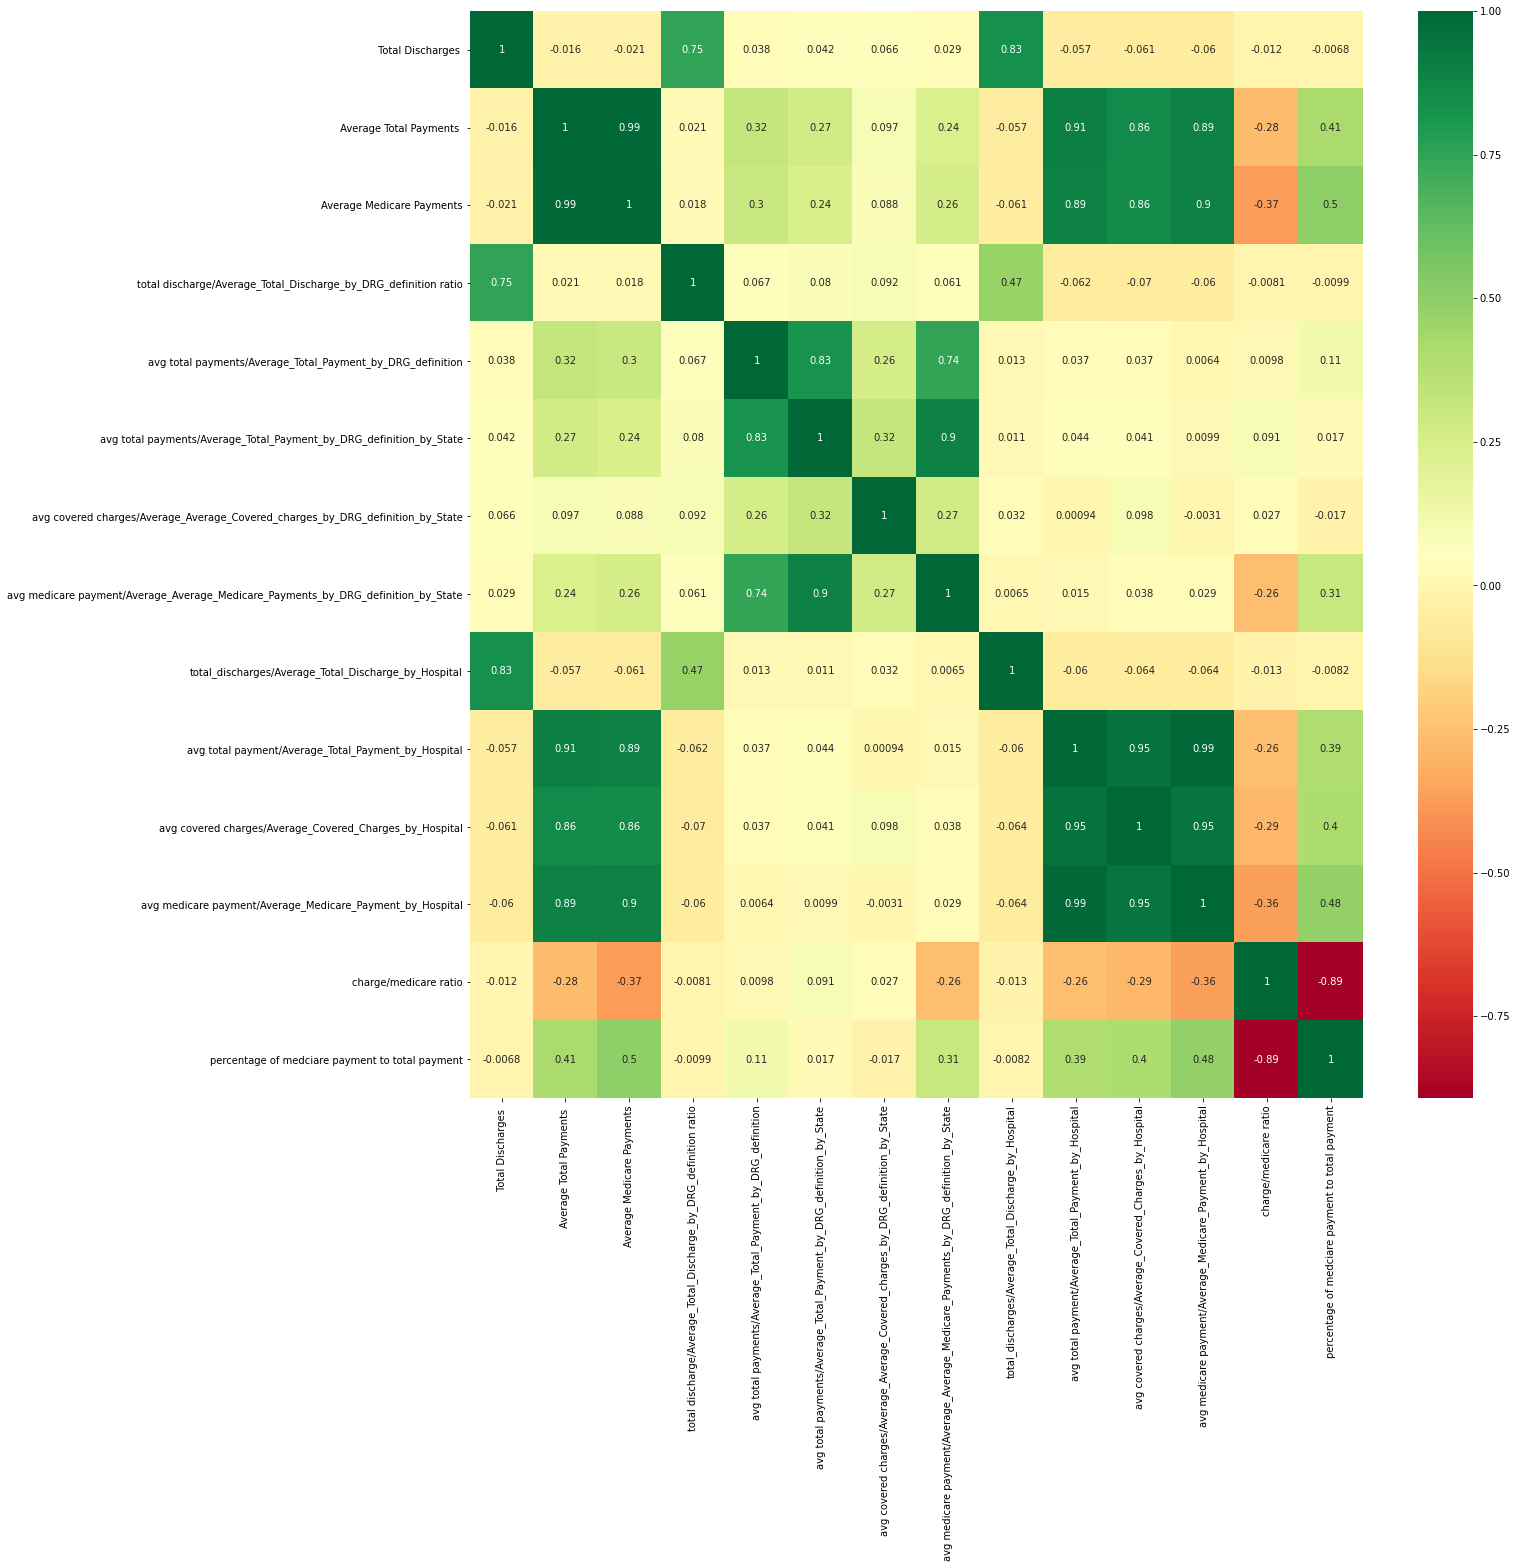

In [8]:
# Correlation Matrix with Heatmap
X = df_clustering.iloc[::]  #independent columns
y = df_clustering.iloc[::]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df_clustering.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_clustering[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
#compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [10]:
columns = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_clustering.columns[columns]
data = df_clustering[selected_columns]

In [11]:
data.columns

Index([' Total Discharges ', ' Average Total Payments ',
       'total discharge/Average_Total_Discharge_by_DRG_definition ratio',
       'avg total payments/Average_Total_Payment_by_DRG_definition',
       'avg total payments/Average_Total_Payment_by_DRG_definition_by_State',
       'avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State',
       'avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State',
       'total_discharges/Average_Total_Discharge_by_Hospital',
       'charge/medicare ratio',
       'percentage of medciare payment to total payment'],
      dtype='object')

In [12]:
len(data.columns)

10

Now the dataset has only those columns with with correlation less than 0.9. We have cut down the features from 14 to 10. 

# Part2: K-Means Clustering & Anomaly Analysis

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [15]:
#standardization
#Method 1:
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)
standardized_X = preprocessing.scale(data)

In [16]:
print(standardized_X)

[[ 0.9436405  -0.51277614  2.52841218 ...  0.60242029  0.09263843
  -0.24998292]
 [-0.56309424 -0.51142839 -0.72427148 ... -0.56689069 -0.20071286
   0.15187496]
 [-0.36741441 -0.55743459 -0.30184503 ... -0.51678625  0.13704458
  -0.30795457]
 ...
 [-0.46525433 -0.52228477 -0.42655941 ... -0.22430072  1.22794162
  -1.53673215]
 [-0.6217982  -0.26672999 -0.80092113 ... -0.62998777 -0.45973047
   0.53645004]
 [-0.60223021 -0.80470063 -0.75412592 ... -0.40228457  0.17017977
  -0.35074742]]


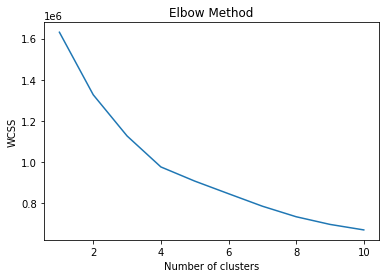

In [17]:
#determine the optimal cluster number using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(standardized_X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

According to the elbow method, 4 seems to be an optimal cluster number so I will apply number of clusters as four in my first k-means clustering model.

### K-Means Clustering(number of clusters = 4)

In [18]:
# k-means clustering
num_clusters = 4
# number of clusters
km = KMeans(n_clusters=4)
km.fit(standardized_X)

KMeans(n_clusters=4)

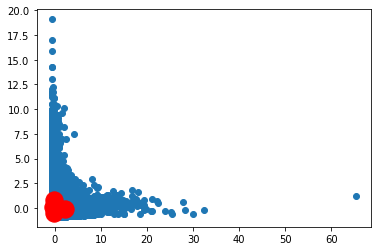

In [19]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(standardized_X)
plt.scatter(standardized_X[:,0], standardized_X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [22]:
data["clusters_4"] = km.labels_

<ipython-input-22-428466cd9561>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clusters_4"] = km.labels_


In [23]:
data.groupby("clusters_4").mean().reset_index()

,clusters_4,Total Discharges,Average Total Payments,total discharge/Average_Total_Discharge_by_DRG_definition ratio,avg total payments/Average_Total_Payment_by_DRG_definition,avg total payments/Average_Total_Payment_by_DRG_definition_by_State,avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State,avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State,total_discharges/Average_Total_Discharge_by_Hospital,charge/medicare ratio,percentage of medciare payment to total payment
0,0,36.558190,15697.159150,0.983567,1.433114,1.346078,1.243247,1.400621,0.872983,1.118927,0.899468
1,1,29.685845,10348.792889,0.810378,0.924620,0.929430,0.925084,0.950709,0.788376,1.126489,0.889959
2,2,154.475669,8785.890171,2.433622,0.985665,0.991680,1.044845,0.986895,2.823233,1.189538,0.845339
3,3,31.778845,5808.068095,0.867778,0.929564,0.962134,1.003528,0.896244,0.829453,1.371933,0.738463


In [24]:
data["clusters_4"].value_counts()

1    82332
3    43639
0    21928
2    15166
Name: clusters_4, dtype: int64

In [35]:
percent_of_data = (data["clusters_4"].value_counts() / data["clusters_4"].value_counts().sum())*100

In [39]:
percentage = pd.DataFrame(percent_of_data).reset_index()

In [42]:
percentage.rename(columns = {"index": "cluster_label","clusters_4":"percent_of_data"},inplace=True)

In [43]:
percentage

,cluster_label,percent_of_data
0,1,50.490295
1,3,26.761721
2,0,13.447398
3,2,9.300586


In [45]:
data[data["clusters_4"]==2]

,Total Discharges,Average Total Payments,total discharge/Average_Total_Discharge_by_DRG_definition ratio,avg total payments/Average_Total_Payment_by_DRG_definition,avg total payments/Average_Total_Payment_by_DRG_definition_by_State,avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State,avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State,total_discharges/Average_Total_Discharge_by_Hospital,charge/medicare ratio,percentage of medciare payment to total payment,clusters_4
0,91,5777.24,2.921770,0.830000,1.005855,1.028667,1.035685,1.548936,1.212756,0.824568,2
5,67,6653.80,2.151193,0.955932,1.158470,0.528041,1.168395,1.659666,1.238114,0.807680,2
8,135,6113.38,4.334494,0.878292,1.064379,0.890120,1.136709,1.282876,1.169264,0.855239,2
54,76,5496.31,2.440159,0.789639,0.898262,0.603801,0.895910,1.579677,1.242205,0.805020,2
60,139,5968.44,4.462923,0.857469,0.975422,0.913098,0.929890,1.848404,1.299617,0.769457,2
...,...,...,...,...,...,...,...,...,...,...,...
162837,88,4421.47,3.129952,0.916411,0.954754,0.951637,0.918942,1.195226,1.286860,0.777085,2
162860,114,4491.50,4.054710,0.930926,0.969876,1.046033,0.963019,0.716035,1.247410,0.801661,2
163004,80,4485.27,2.845411,0.929635,1.109956,1.431392,1.090460,0.847421,1.254470,0.797149,2
163020,76,4101.96,2.703140,0.850188,0.885378,1.001313,0.924652,1.974026,1.236428,0.808782,2


#### From two tables above, Cluster number 2 seems to be anomalous and might be where the fraud occurs. First of all, this cluster accounts for 9.3% percent of data, which is smaller than 10% and can be a good percentage for anomaly. Second of all, this cluster has an extremly high total discharges at 154.48 with all other clusters having total discharges around 30. And in fact, this cluster has a very high ratio of total discharge to average total discharge by the same DRG deifinition at 2.43. Meanwhile, its ratio of average total payments to average total payment of the same DRG definition is also the second highest at 0.99, compared to the highest of cluster number 2 at 1.43. Although this cluster doesn't have the highest average total payments, it has a relatively low ratio of medicare payment to total payment. I believe that when a frauster commit a fraud, he or she will probably not be charging much more money and many more times at a crazy number at the same time. In order to avoid being caught, they will be cautious. This means that they will probably charge slightly more than . This is why I believe in this case, cluster 2 that charges about 2.43 times more frequently for the same DRG category might be anomalies.

### K-Means Clustering(number of clusters = 6)

In [46]:
# k-means clustering
num_clusters = 6
# number of clusters
km = KMeans(n_clusters=6)
km.fit(standardized_X)

KMeans(n_clusters=6)

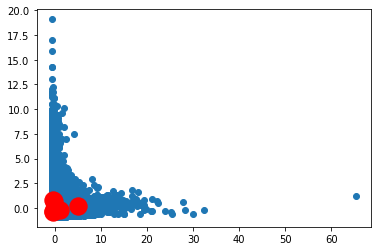

In [47]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(standardized_X)
plt.scatter(standardized_X[:,0], standardized_X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [50]:
data["clusters_6"] = km.labels_
data.groupby("clusters_6").mean().reset_index()

<ipython-input-50-df97fdec0a80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clusters_6"] = km.labels_


,clusters_6,Total Discharges,Average Total Payments,total discharge/Average_Total_Discharge_by_DRG_definition ratio,avg total payments/Average_Total_Payment_by_DRG_definition,avg total payments/Average_Total_Payment_by_DRG_definition_by_State,avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State,avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State,total_discharges/Average_Total_Discharge_by_Hospital,charge/medicare ratio,percentage of medciare payment to total payment,clusters_4
0,0,25.737381,8453.934061,0.720801,0.916265,0.925044,0.914571,0.945853,0.726531,1.142468,0.877929,1.212157
1,1,303.398527,10929.504063,3.443144,1.029096,1.019438,1.045928,1.013315,5.018585,1.179359,0.853047,1.997053
2,2,26.569879,33421.903215,0.956975,1.050084,1.017938,1.029115,1.028265,0.573761,1.071080,0.937693,0.740064
3,3,37.217816,12466.269750,0.969723,1.454626,1.366689,1.245187,1.428427,0.897856,1.124051,0.895152,0.025026
4,4,96.058034,8012.404641,1.886762,0.964406,0.974138,1.043275,0.971188,1.961058,1.190564,0.844129,1.815385
5,5,28.475683,5894.002118,0.816107,0.939826,0.973976,1.015001,0.884917,0.755251,1.416883,0.716026,2.997186


In [51]:
data["clusters_6"].value_counts()

0    77108
5    31275
4    24348
3    19140
2     8479
1     2715
Name: clusters_6, dtype: int64

In [49]:
percent_of_data = (data["clusters_6"].value_counts() / data["clusters_6"].value_counts().sum())*100
percentage = pd.DataFrame(percent_of_data).reset_index()
percentage.rename(columns = {"index": "cluster_label","clusters_4":"percent_of_data"},inplace=True)
percentage

,cluster_label,clusters_6
0,0,47.286665
1,5,19.179468
2,4,14.931469
3,3,11.737651
4,2,5.199767
5,1,1.664980


In this model, cluster number 1 seems to be suspicious and anomalous.

In [70]:
data[data["clusters_6"]==1]

,Total Discharges,Average Total Payments,total discharge/Average_Total_Discharge_by_DRG_definition ratio,avg total payments/Average_Total_Payment_by_DRG_definition,avg total payments/Average_Total_Payment_by_DRG_definition_by_State,avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State,avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State,total_discharges/Average_Total_Discharge_by_Hospital,charge/medicare ratio,percentage of medciare payment to total payment,clusters_4,clusters_6
394,190,5332.51,6.100399,0.766106,0.873528,0.454246,0.880822,4.583836,1.236946,0.808443,2,1
1251,224,6077.88,8.904541,0.906297,1.063366,0.988412,1.078788,0.867276,1.183796,0.844740,2,1
2941,177,18657.55,4.729084,1.406649,1.598880,1.651570,1.619000,3.507906,1.070647,0.934014,2,1
3283,175,15890.00,4.675648,1.197995,1.120961,1.924900,1.107571,4.962339,1.088401,0.918779,2,1
3430,183,15434.02,4.889392,1.163618,1.264886,1.226521,1.284796,2.483039,1.071437,0.933326,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
158763,262,6060.41,7.432973,1.224348,0.960772,0.477417,0.975468,5.559304,1.142618,0.875183,2,1
158820,161,5353.58,4.567590,1.081552,1.188430,0.557324,1.232352,5.689046,1.196686,0.835641,2,1
158851,431,3913.14,12.227525,0.790548,0.868670,0.372160,0.897499,1.000000,1.201053,0.832602,2,1
158916,199,6053.35,5.645655,1.222922,1.134229,0.618463,1.177057,6.135389,1.134700,0.881291,2,1


In [71]:
anomaly = data[data["clusters_6"]==1]

In [72]:
anomaly["clusters_4"].value_counts()

2    2711
0       4
Name: clusters_4, dtype: int64

#### In fact, Most of the cases I identified as anomalies in this K-means clustering(cluster = 6) also appear in the anomalous cluster I indentified in the previous k-means clustering model(cluster number = 4).

#### Here, I identify cluster number 1 to be a suspicious and anomalous group. First of all, they account for 1.66% percent of the entire dataset, which sounds more right for a percentage for fraud. Also, this cluster has a total discharge that is about 3.44 times of average total discharge by the same DRG definition, an average total payments that is 1.03 times of average total payments by the same DRG definition, and an average total payments that is 1.02 times of average total payments by the same DRG definition in the same state. 